In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('house_data.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum().sum()

np.int64(7829)

In [6]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [7]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [8]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df["LotFrontage"].mean()

np.float64(70.04995836802665)

In [13]:
df["LotFrontage"] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [15]:
df = df.drop('Alley', axis=1)

In [16]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

MasVnrType object 872
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
FireplaceQu object 690
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81
PoolQC object 1453
Fence object 1179
MiscFeature object 1406


In [19]:
df = df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [22]:
df.dropna(subset = "BsmtQual", axis = 0, inplace = True)

In [23]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

BsmtExposure object 1
BsmtFinType2 object 1
Electrical object 1
GarageType object 74
GarageFinish object 74
GarageQual object 74
GarageCond object 74


In [24]:
df.dropna(subset = "GarageType", axis=0, inplace=True)

In [25]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i, df[i].dtype, df[i].isna().sum())

BsmtExposure object 1
BsmtFinType2 object 1
Electrical object 1


In [26]:
df.dropna(subset = "BsmtExposure", axis=0, inplace=True)

In [27]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i, df[i].dtype, df[i].isna().sum())


BsmtFinType2 object 1
Electrical object 1


In [28]:
df.dropna(subset = "BsmtFinType2", axis=0, inplace=True)

In [29]:
df.dropna(subset = "Electrical", axis=0, inplace=True)

In [30]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i, df[i].dtype, df[i].isna().sum())

In [31]:
for i in df.columns:
    if(df[i].dtype == 'float64' and df[i].isna().sum()!=0):
        print(i, df[i].dtype, df[i].isna().sum())

MasVnrArea float64 8


In [32]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [34]:
for i in df.columns:
    if(df[i].dtype == 'int64' and df[i].isna().sum()!=0):
        print(i, df[i].dtype, df[i].isna().sum())

# Now check zeroes

In [35]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

BsmtFinSF1 int64 394
BsmtFinSF2 int64 1184
BsmtUnfSF int64 73
2ndFlrSF int64 753
LowQualFinSF int64 1328
BsmtFullBath int64 766
BsmtHalfBath int64 1266
FullBath int64 8
HalfBath int64 811
BedroomAbvGr int64 6
Fireplaces int64 595
WoodDeckSF int64 675
OpenPorchSF int64 575
EnclosedPorch int64 1162
3SsnPorch int64 1323
ScreenPorch int64 1230
PoolArea int64 1339
MiscVal int64 1299


In [36]:
df = df.drop(['MiscVal','PoolArea','ScreenPorch', '3SsnPorch' ,'BsmtFinSF2' , 'LowQualFinSF' ,'BsmtHalfBath' ,'HalfBath' ,'EnclosedPorch'] , axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [37]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

BsmtFinSF1 int64 394
BsmtUnfSF int64 73
2ndFlrSF int64 753
BsmtFullBath int64 766
FullBath int64 8
BedroomAbvGr int64 6
Fireplaces int64 595
WoodDeckSF int64 675
OpenPorchSF int64 575


In [38]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].replace(0, df['BsmtFinSF1'].mean())

In [39]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].replace( 0, df['BsmtUnfSF'].mean())

In [40]:
df['2ndFlrSF'] = df['2ndFlrSF'].replace(0, df['2ndFlrSF'].mean())

In [41]:
df['BsmtFullBath'] = df['BsmtFullBath'].replace(0, df['BsmtFullBath'].mean())

In [42]:
df['FullBath'] = df['FullBath'].replace(0, df['FullBath'].mean())

In [43]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].replace(0, df['BedroomAbvGr'].mean())

In [44]:
df['Fireplaces'] = df['Fireplaces'].replace(0, df['Fireplaces'].mean())

In [45]:
df['WoodDeckSF'] = df['WoodDeckSF'].replace(0, df['WoodDeckSF'].mean())

In [46]:
df['OpenPorchSF'] = df['OpenPorchSF'].replace(0, df['OpenPorchSF'].mean())

In [47]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

In [48]:
for i in df.columns:
    if(df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

MasVnrArea float64 760


In [49]:
df['MasVnrArea'] = df['MasVnrArea'].replace(0, df['MasVnrArea'].mean())

In [50]:
for i in df.columns:
    if (df[i].dtype == 'object'):
        print(i , df[i].dtype)

MSZoning object
Street object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Heating object
HeatingQC object
CentralAir object
Electrical object
KitchenQual object
Functional object
GarageType object
GarageFinish object
GarageQual object
GarageCond object
PavedDrive object
SaleType object
SaleCondition object


In [51]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        print(i , df[i].value_counts())

MSZoning MSZoning
RL         1071
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64
Street Street
Pave    1341
Grvl       5
Name: count, dtype: int64
LotShape LotShape
Reg    835
IR1    461
IR2     40
IR3     10
Name: count, dtype: int64
LandContour LandContour
Lvl    1214
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Utilities Utilities
AllPub    1345
NoSeWa       1
Name: count, dtype: int64
LotConfig LotConfig
Inside     963
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: count, dtype: int64
LandSlope LandSlope
Gtl    1273
Mod      61
Sev      12
Name: count, dtype: int64
Neighborhood Neighborhood
NAmes      209
CollgCr    147
OldTown    100
Somerst     86
Gilbert     78
NridgHt     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
Mead

# CONVERRT OBJECT VALUES INTO NUMERICAL

In [52]:
le = LabelEncoder()

for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i] = le.fit_transform(df[i])
        print(i , df[i].value_counts())

MSZoning MSZoning
3    1071
4     191
1      65
2      11
0       8
Name: count, dtype: int64
Street Street
1    1341
0       5
Name: count, dtype: int64
LotShape LotShape
3    835
0    461
1     40
2     10
Name: count, dtype: int64
LandContour LandContour
3    1214
0      52
1      48
2      32
Name: count, dtype: int64
Utilities Utilities
0    1345
1       1
Name: count, dtype: int64
LotConfig LotConfig
4    963
0    245
1     91
2     43
3      4
Name: count, dtype: int64
LandSlope LandSlope
0    1273
1      61
2      12
Name: count, dtype: int64
Neighborhood Neighborhood
12    209
5     147
17    100
21     86
8      78
16     76
14     73
7      70
19     69
20     54
6      51
3      47
11     42
15     41
23     37
9      29
4      26
22     25
18     20
0      17
2      15
10     12
24     11
13      9
1       2
Name: count, dtype: int64
Condition1 Condition1
2    1170
1      63
0      43
6      26
4      19
5      10
3       8
8       5
7       2
Name: count, dtype: int64
Con

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   int64  
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   int64  
 6   LotShape       1346 non-null   int64  
 7   LandContour    1346 non-null   int64  
 8   Utilities      1346 non-null   int64  
 9   LotConfig      1346 non-null   int64  
 10  LandSlope      1346 non-null   int64  
 11  Neighborhood   1346 non-null   int64  
 12  Condition1     1346 non-null   int64  
 13  Condition2     1346 non-null   int64  
 14  BldgType       1346 non-null   int64  
 15  HouseStyle     1346 non-null   int64  
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [54]:
df.isna().sum().sum()

np.int64(0)

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.shape

(1346, 66)

# CORRELATION

In [57]:
correlation = df.corr()
correlation

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.016151 -0.009639    -0.011789 -0.036507   
MSSubClass     0.016151    1.000000  0.017811    -0.360201 -0.135995   
MSZoning      -0.009639    0.017811  1.000000    -0.088991 -0.023951   
LotFrontage   -0.011789   -0.360201 -0.088991     1.000000  0.299898   
LotArea       -0.036507   -0.135995 -0.023951     0.299898  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.023310   -0.015948 -0.019094     0.014158 -0.001991   
YrSold         0.000018   -0.021460 -0.022157     0.010726 -0.013415   
SaleType       0.013126    0.010772  0.095048    -0.024890  0.014859   
SaleCondition  0.001819   -0.010778 -0.008889     0.046891  0.028344   
SalePrice     -0.026857   -0.081120 -0.162067     0.329520  0.253854   

                 Street  LotShape  LandContour  Utilities  LotConfig  ...  \
Id             0.006110  0.034822    -0.014571   0.013790   0.062671  ...   
MSSubClass    -0.020624  0.099092     0.004291  -0.023882   0.064806  ...   
MSZoning       0.098863  0.056129    -0.026716  -0.000837  -0.018868  ...   
LotFrontage   -0.034653 -0.132124    -0.071211  -0.000732  -0.169329  ...   
LotArea       -0.214624 -0.163527    -0.168455   0.009667  -0.122189  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.001450 -0.043293    -0.018705  -0.053831   0.015179  ...   
YrSold        -0.036469  0.033646     0.018702   0.024490  -0.006659  ...   
SaleType       0.019299 -0.007536    -0.027785  -0.129632   0.008239  ...   
SaleCondition  0.011925 -0.030437     0.006286  -0.098010   0.060510  ...   
SalePrice      0.042129 -0.248841     0.002661  -0.017098  -0.063082  ...   

               GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id              -0.002595   -0.009759   -0.017654   -0.014014    -0.003071   
MSSubClass       0.003734   -0.008269   -0.011511   -0.027921    -0.013863   
MSZoning        -0.161304   -0.092422   -0.118304   -0.003165    -0.095421   
LotFrontage      0.059072    0.051667    0.075024    0.079092     0.130532   
LotArea          0.022035    0.030891   -0.015280    0.198028     0.082442   
...                   ...         ...         ...         ...          ...   
MoSold           0.012376    0.003900   -0.011095    0.003403     0.059998   
YrSold           0.040502    0.031819    0.001113    0.018712    -0.052525   
SaleType        -0.031875   -0.016595   -0.047573    0.069541    -0.015687   
SaleCondition    0.057811    0.029204    0.021956    0.039943     0.048593   
SalePrice        0.121029    0.147901    0.176629    0.267777     0.219385   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.023310  0.000018  0.013126       0.001819  -0.026857  
MSSubClass    -0.015948 -0.021460  0.010772      -0.010778  -0.081120  
MSZoning      -0.019094 -0.022157  0.095048      -0.008889  -0.162067  
LotFrontage    0.014158  0.010726 -0.024890       0.046891   0.329520  
LotArea       -0.001991 -0.013415  0.014859       0.028344   0.253854  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.145241 -0.042233       0.031745   0.042637  
YrSold        -0.145241  1.000000  0.007127      -0.006552  -0.023478  
SaleType      -0.042233  0.007127  1.000000       0.199077  -0.047806  
SaleCondition  0.031745 -0.006552  0.199077       1.000000   0.203785  
SalePrice      0.042637 -0.023478 -0.047806       0.203785   1.000000  

[66 rows x 66 columns]

<Axes: >

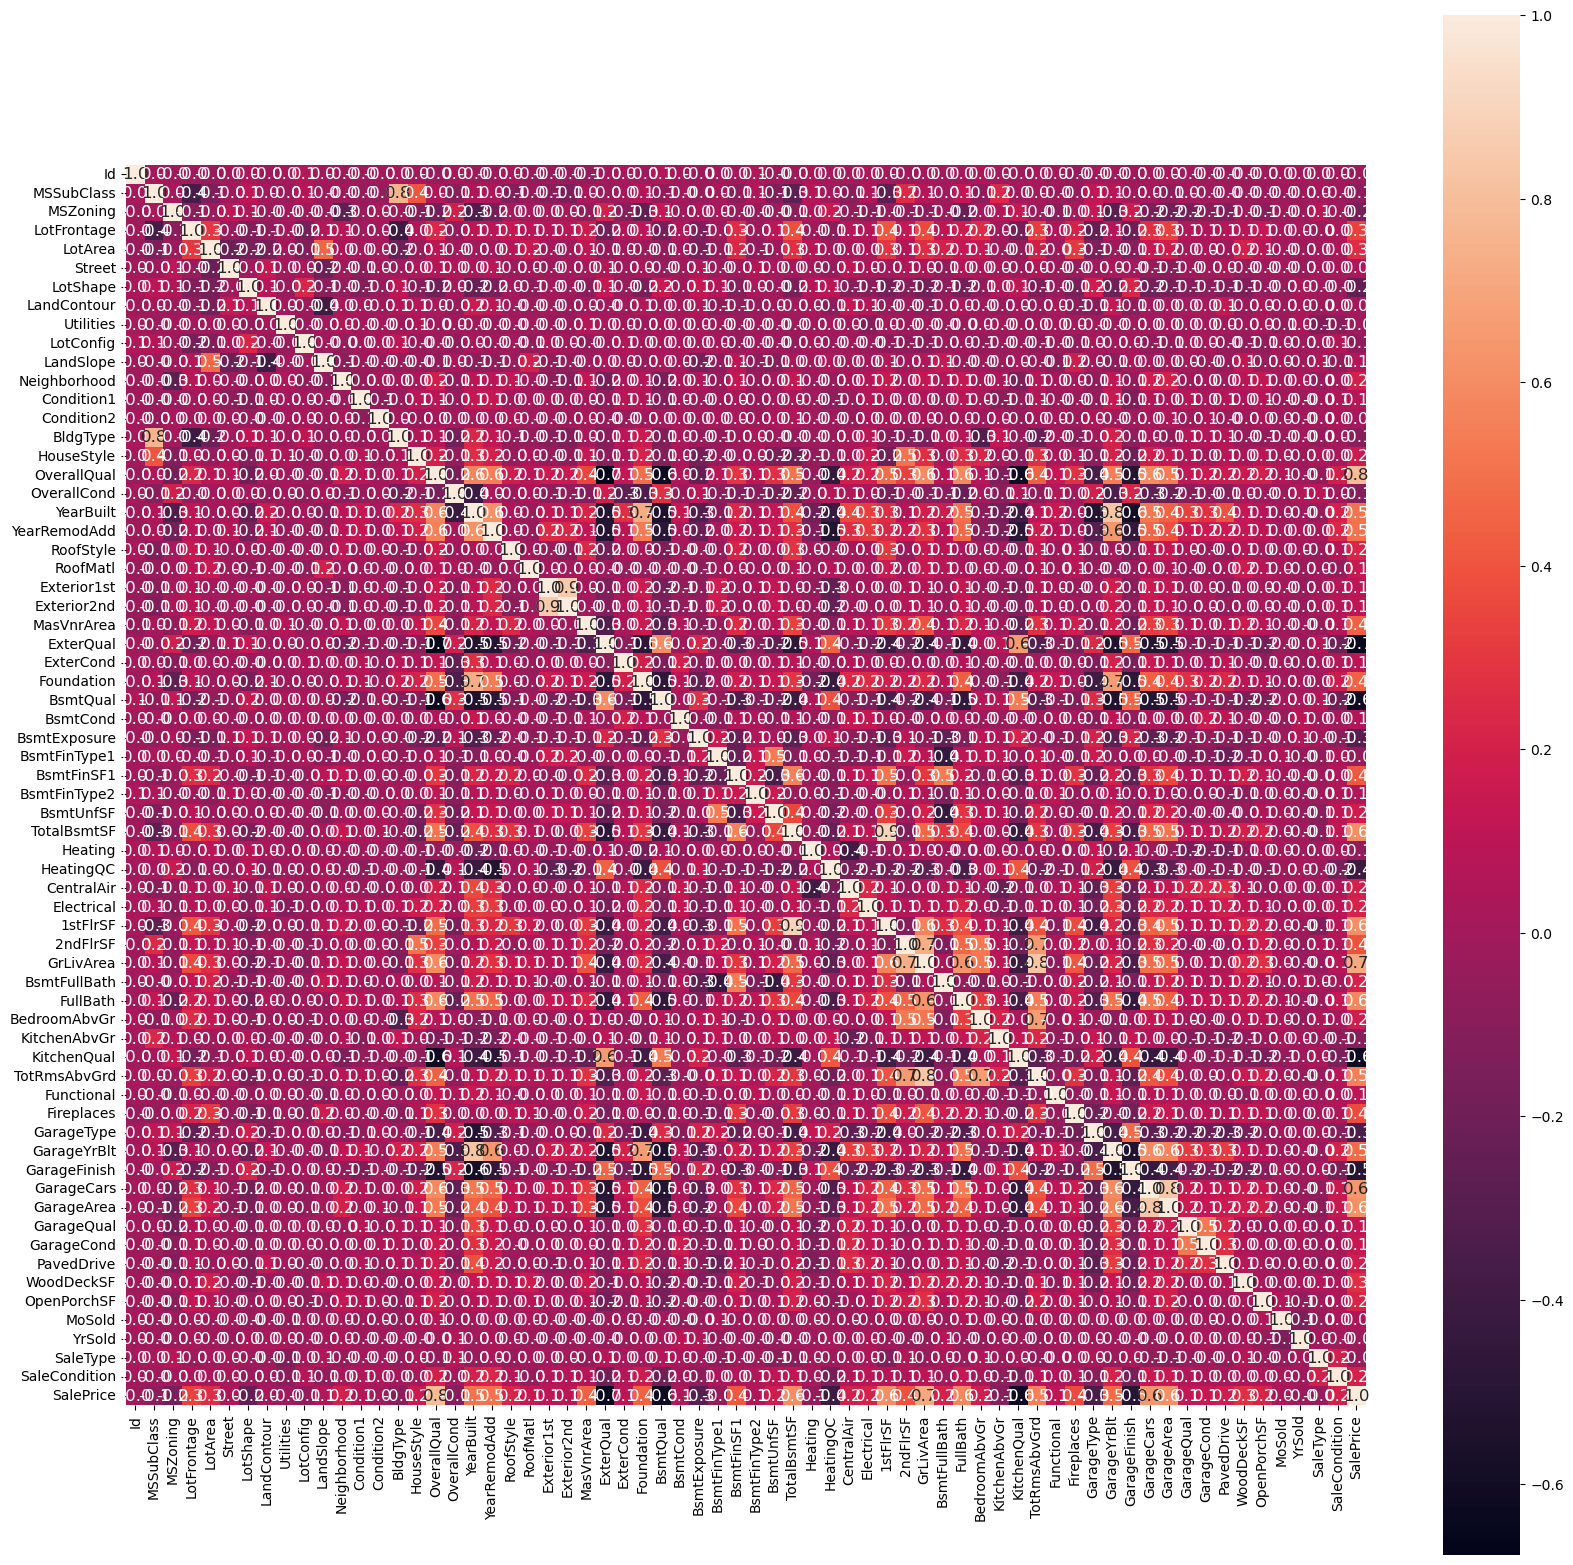

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [59]:
G1 = df.iloc[ :, :19]
G1.shape

(1346, 19)

In [60]:
G2 = df.iloc[ :, 19: 38]
G2.shape

(1346, 19)

In [61]:
G3 = df.iloc[ :,38: 57]
G3.shape

(1346, 19)

In [62]:
G4 = df.iloc[ : ,57 : 66]
G4.shape

(1346, 9)

<Axes: >

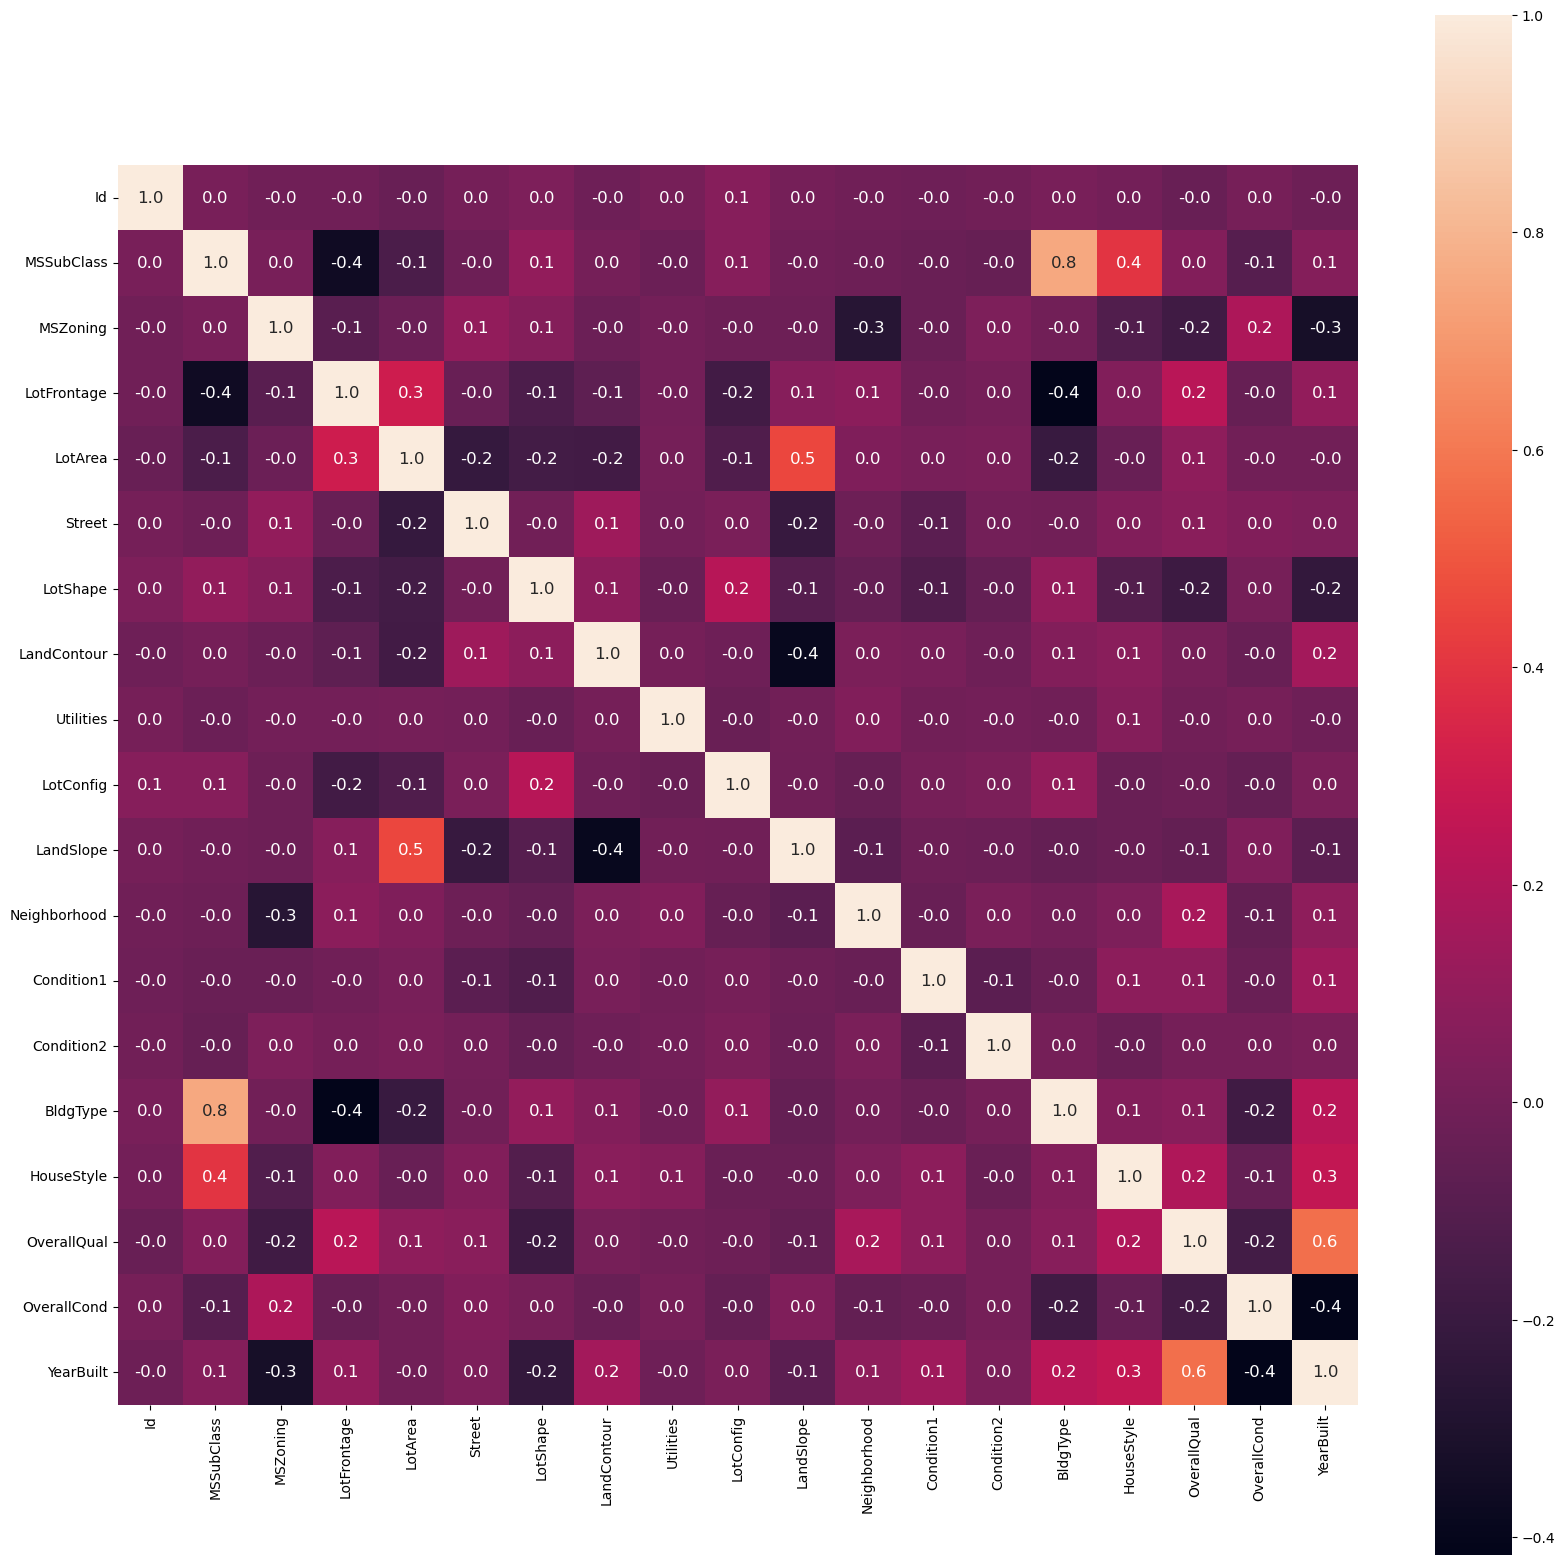

In [63]:
# constructing a heatmap to nderstand the correlation
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':12})

In [64]:
G1 =G1.drop(['OverallCond','Condition2','Condition1','Neighborhood','LandSlope' , 'Id' ,'MSZoning' , 'Street' , 'LandContour' , 'Utilities' ,'LotConfig' ] , axis = 1)

<Axes: >

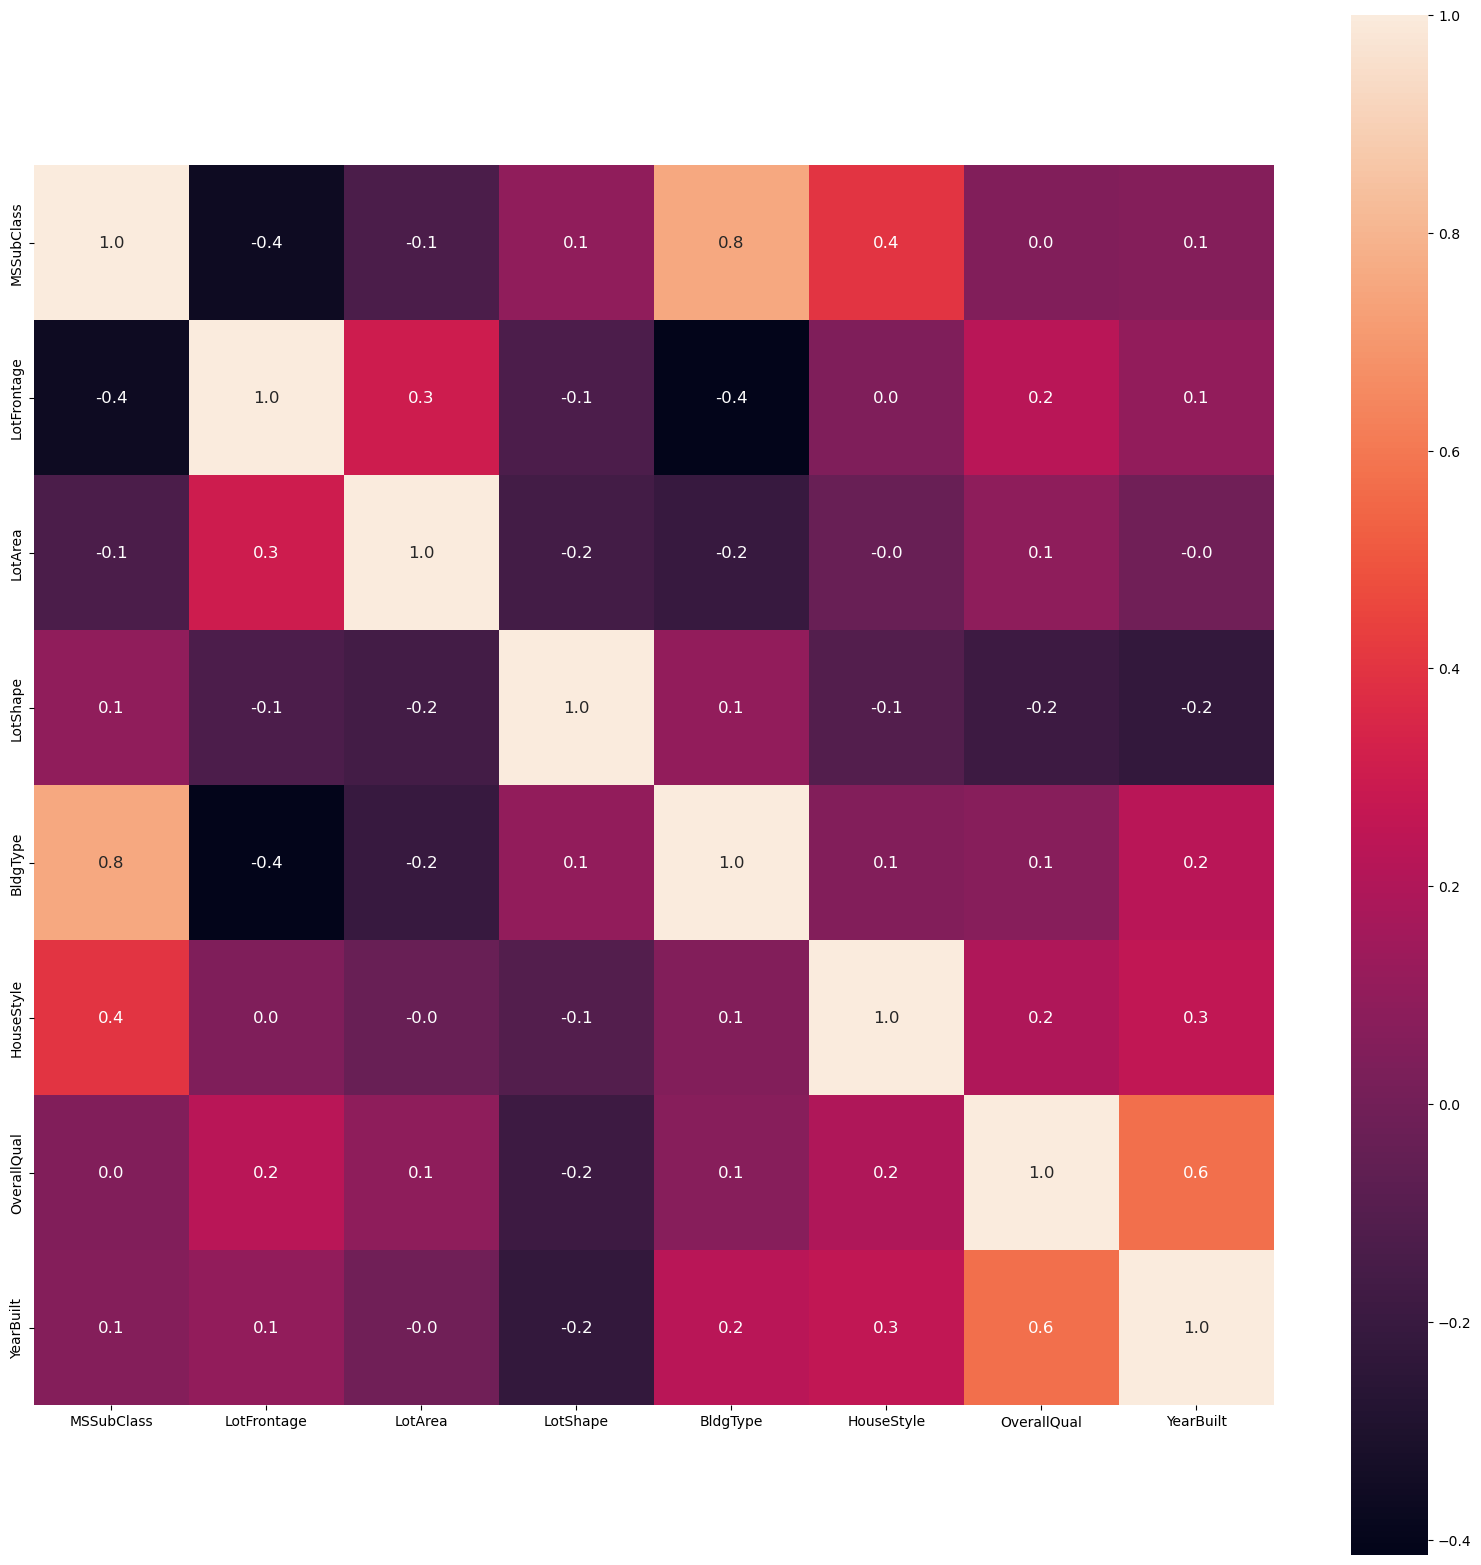

In [65]:
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [66]:
df =df.drop(['OverallCond','Condition2','Condition1','Neighborhood','LandSlope' , 'Id' ,'MSZoning' , 'Street' , 'LandContour' , 'Utilities' ,'LotConfig' ] , axis = 1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   RoofStyle      1346 non-null   int64  
 10  RoofMatl       1346 non-null   int64  
 11  Exterior1st    1346 non-null   int64  
 12  Exterior2nd    1346 non-null   int64  
 13  MasVnrArea     1346 non-null   float64
 14  ExterQual      1346 non-null   int64  
 15  ExterCond      1346 non-null   int64  
 16  Foundation     1346 non-null   int64  
 17  BsmtQual       1346 non-null   int64  
 18  BsmtCond     

<Axes: >

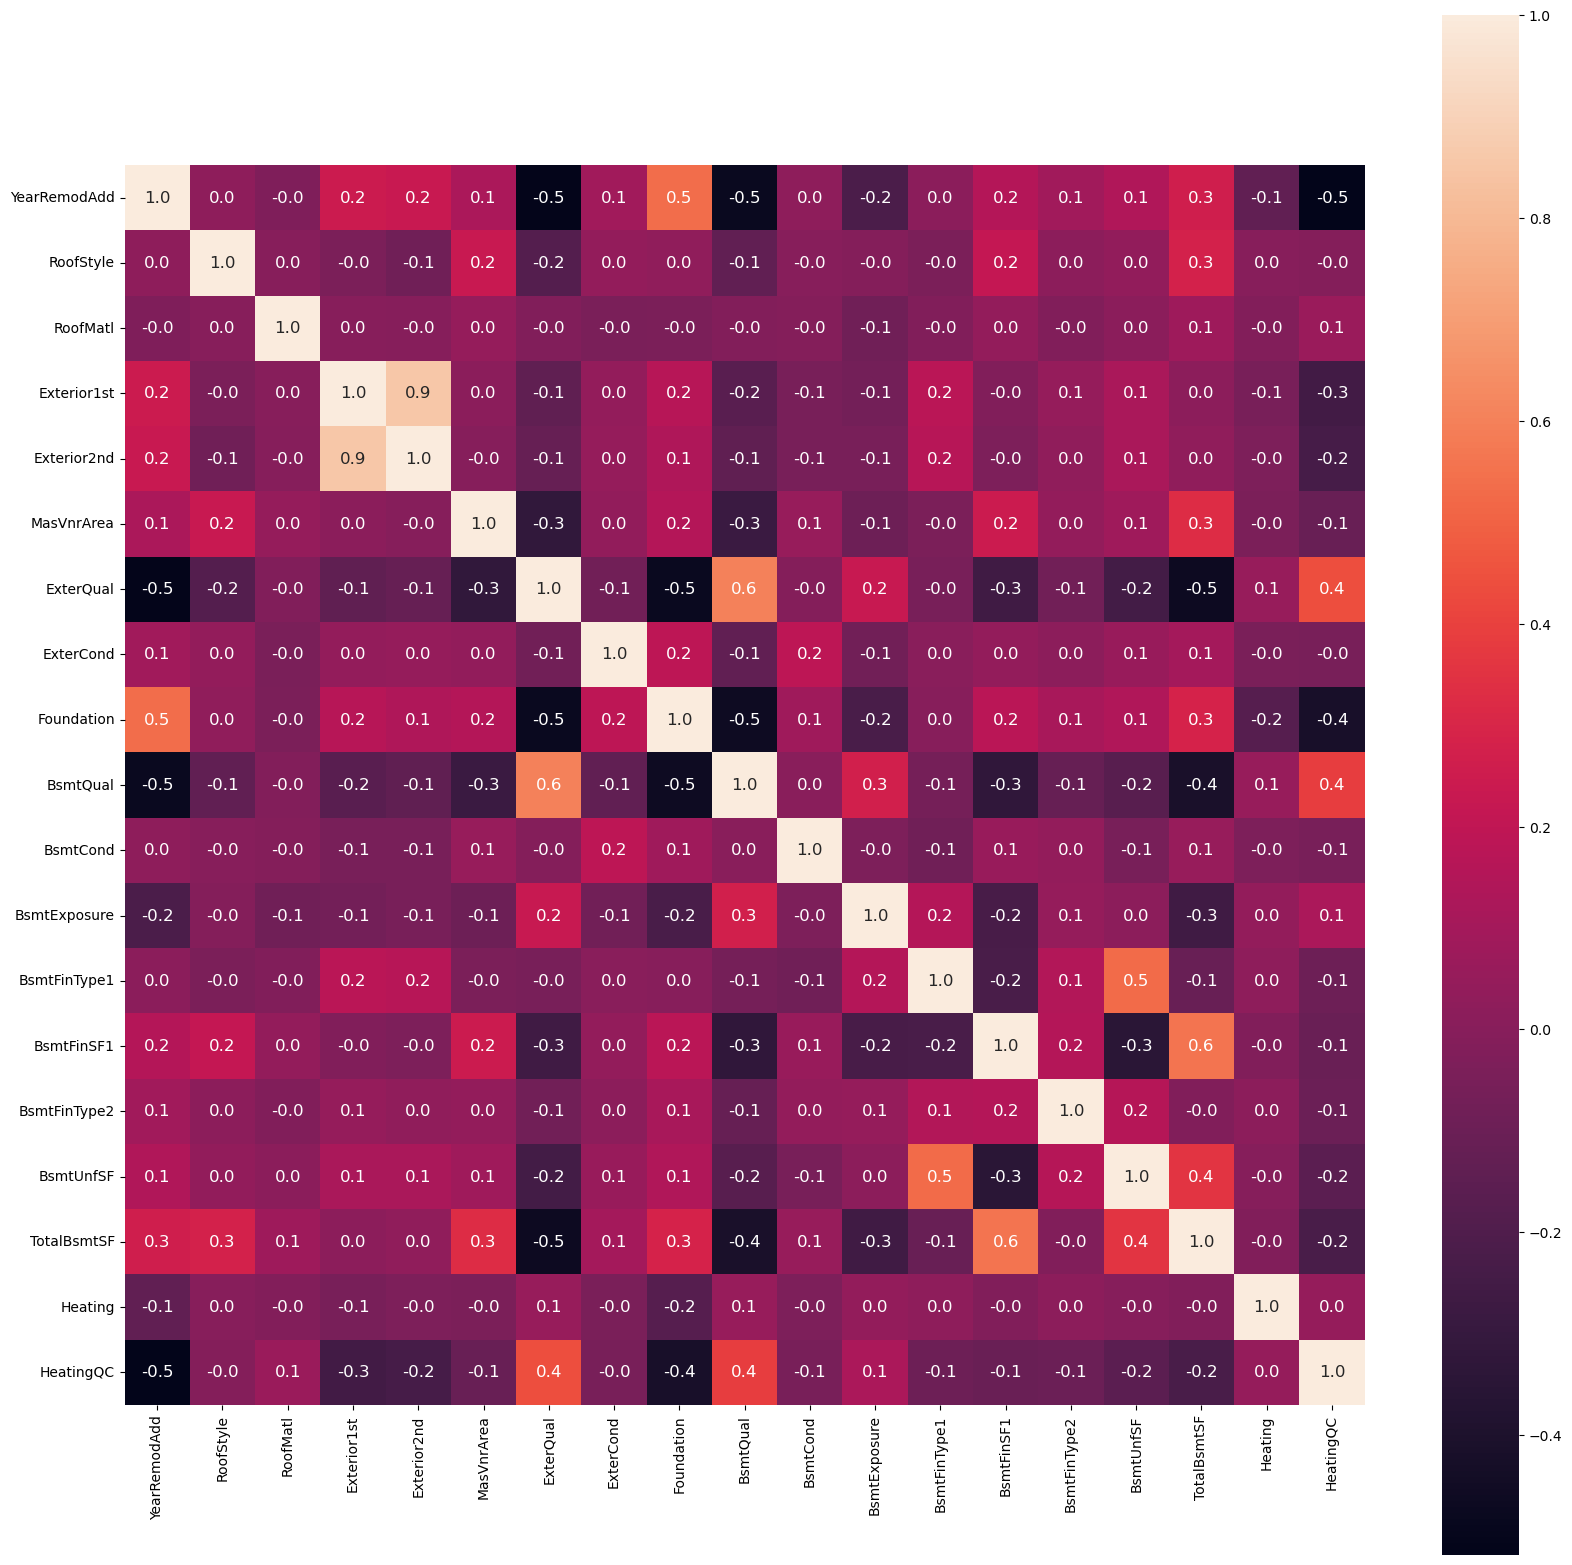

In [68]:
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [69]:
G2 = G2.drop([ 'Heating', 'ExterCond','RoofMatl' ,'RoofStyle'] , axis= 1)
G2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1346 non-null   int64  
 1   Exterior1st   1346 non-null   int64  
 2   Exterior2nd   1346 non-null   int64  
 3   MasVnrArea    1346 non-null   float64
 4   ExterQual     1346 non-null   int64  
 5   Foundation    1346 non-null   int64  
 6   BsmtQual      1346 non-null   int64  
 7   BsmtCond      1346 non-null   int64  
 8   BsmtExposure  1346 non-null   int64  
 9   BsmtFinType1  1346 non-null   int64  
 10  BsmtFinSF1    1346 non-null   float64
 11  BsmtFinType2  1346 non-null   int64  
 12  BsmtUnfSF     1346 non-null   float64
 13  TotalBsmtSF   1346 non-null   int64  
 14  HeatingQC     1346 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 168.2 KB


<Axes: >

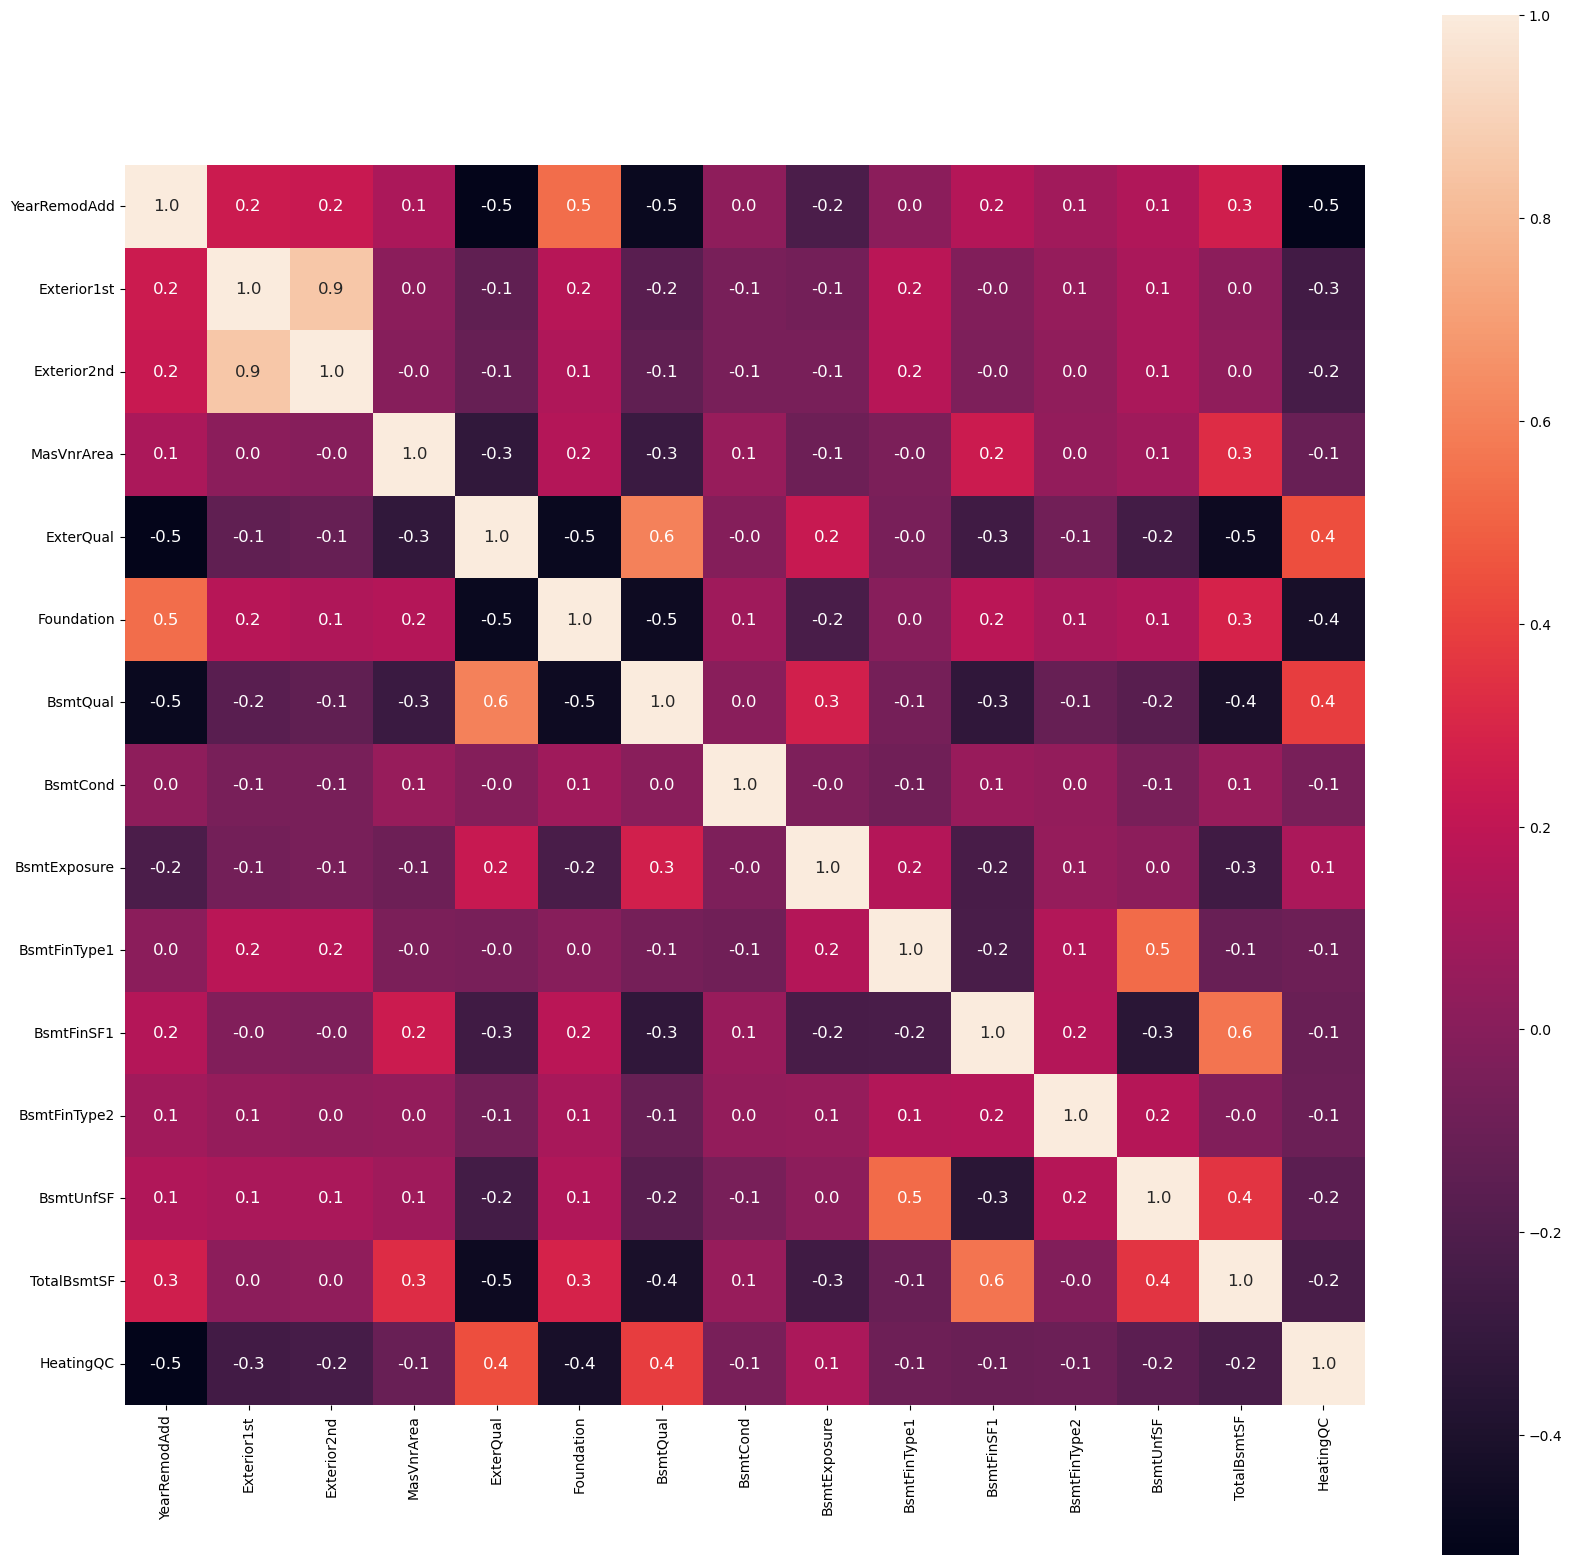

In [70]:
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

<Axes: >

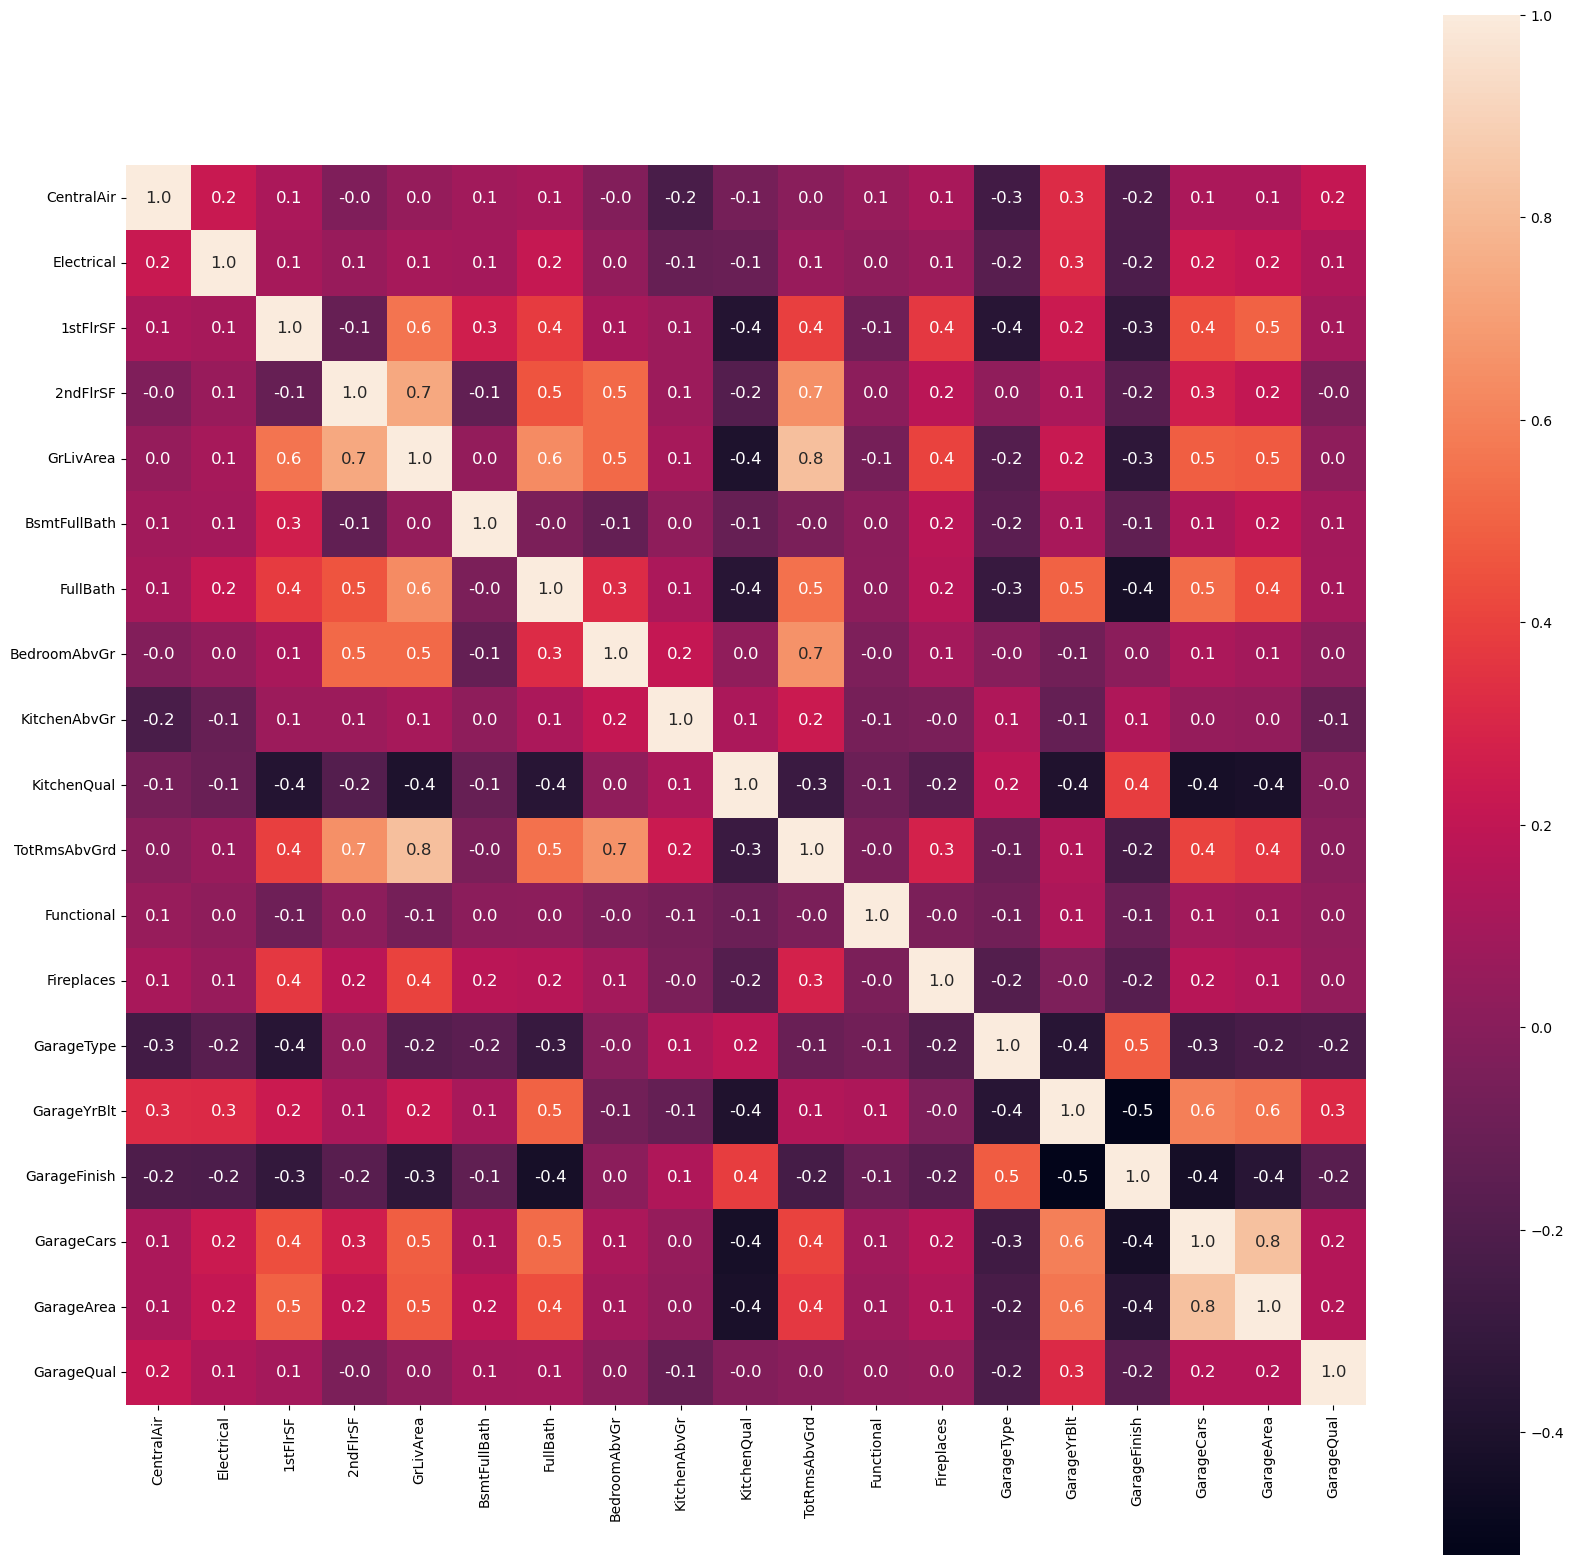

In [71]:
correlation = G3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

<Axes: >

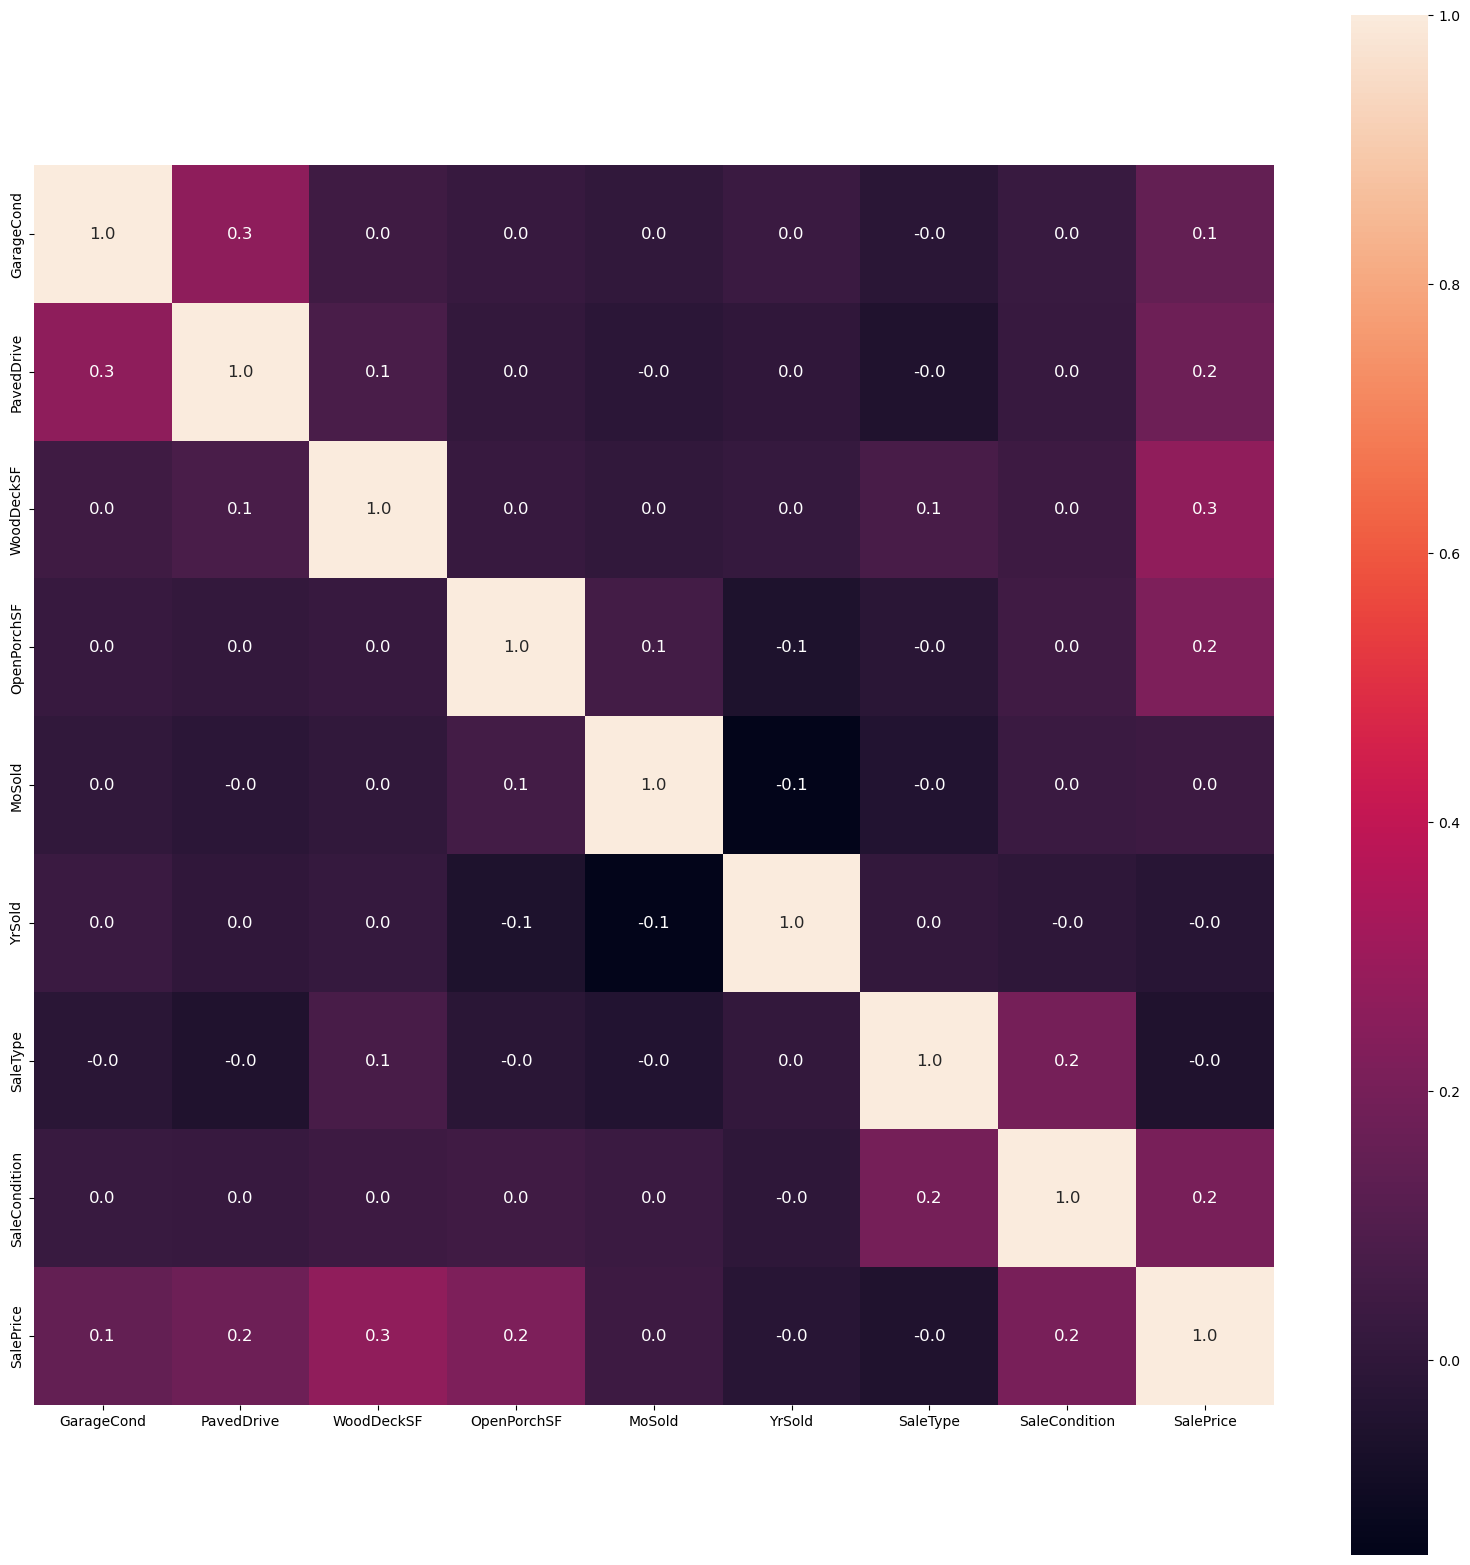

In [72]:
correlation = G4.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   RoofStyle      1346 non-null   int64  
 10  RoofMatl       1346 non-null   int64  
 11  Exterior1st    1346 non-null   int64  
 12  Exterior2nd    1346 non-null   int64  
 13  MasVnrArea     1346 non-null   float64
 14  ExterQual      1346 non-null   int64  
 15  ExterCond      1346 non-null   int64  
 16  Foundation     1346 non-null   int64  
 17  BsmtQual       1346 non-null   int64  
 18  BsmtCond     

<Axes: >

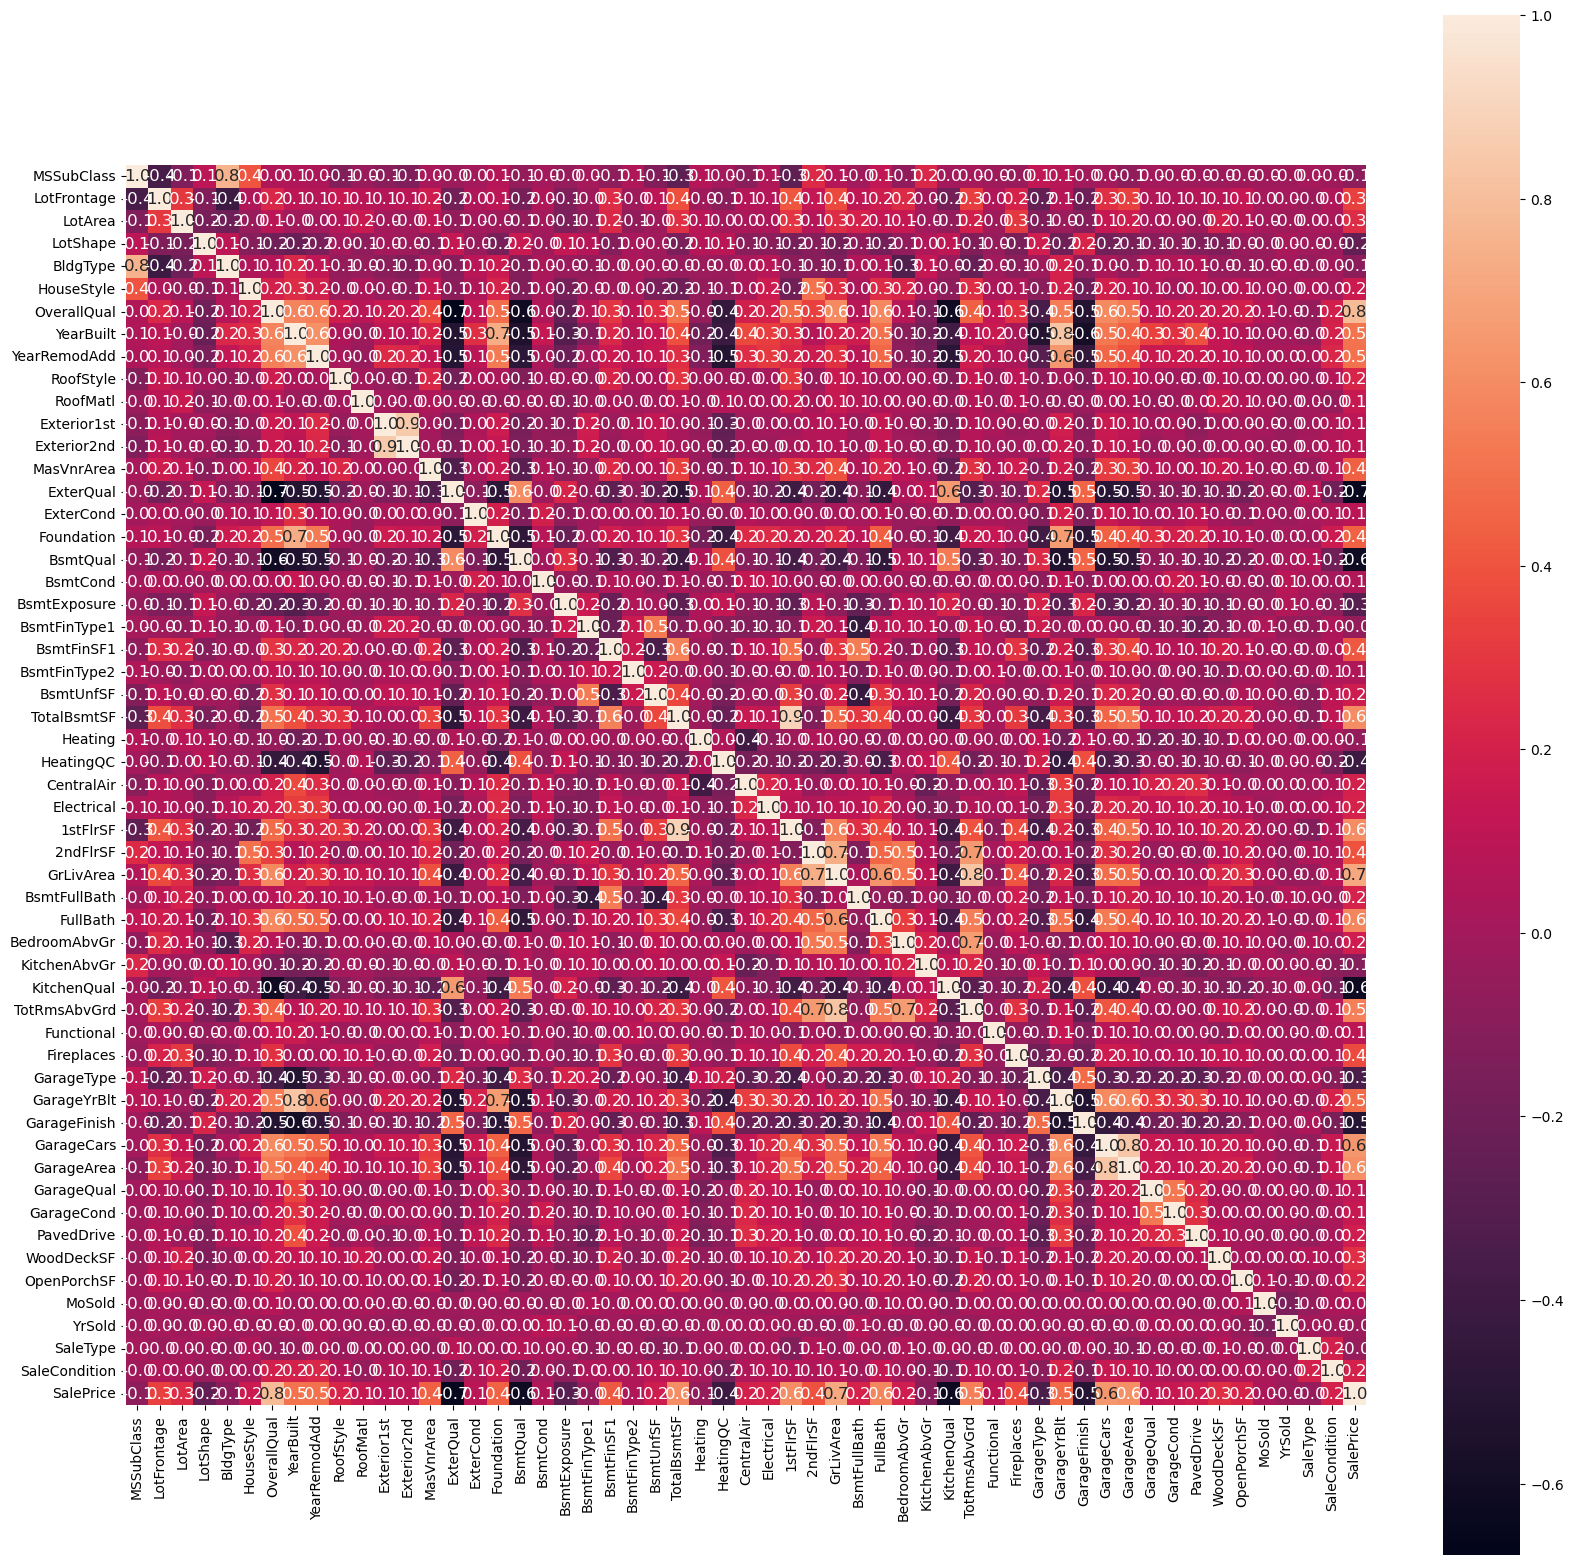

In [74]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [75]:
G1 = df.iloc[ : , :20]
G1.shape

(1346, 20)

In [76]:
G2 = df.iloc[ : ,20 :40]
G2.shape

(1346, 20)

In [77]:
G3 = df.iloc[ : ,40 :51]
G3.shape

(1346, 11)

<Axes: >

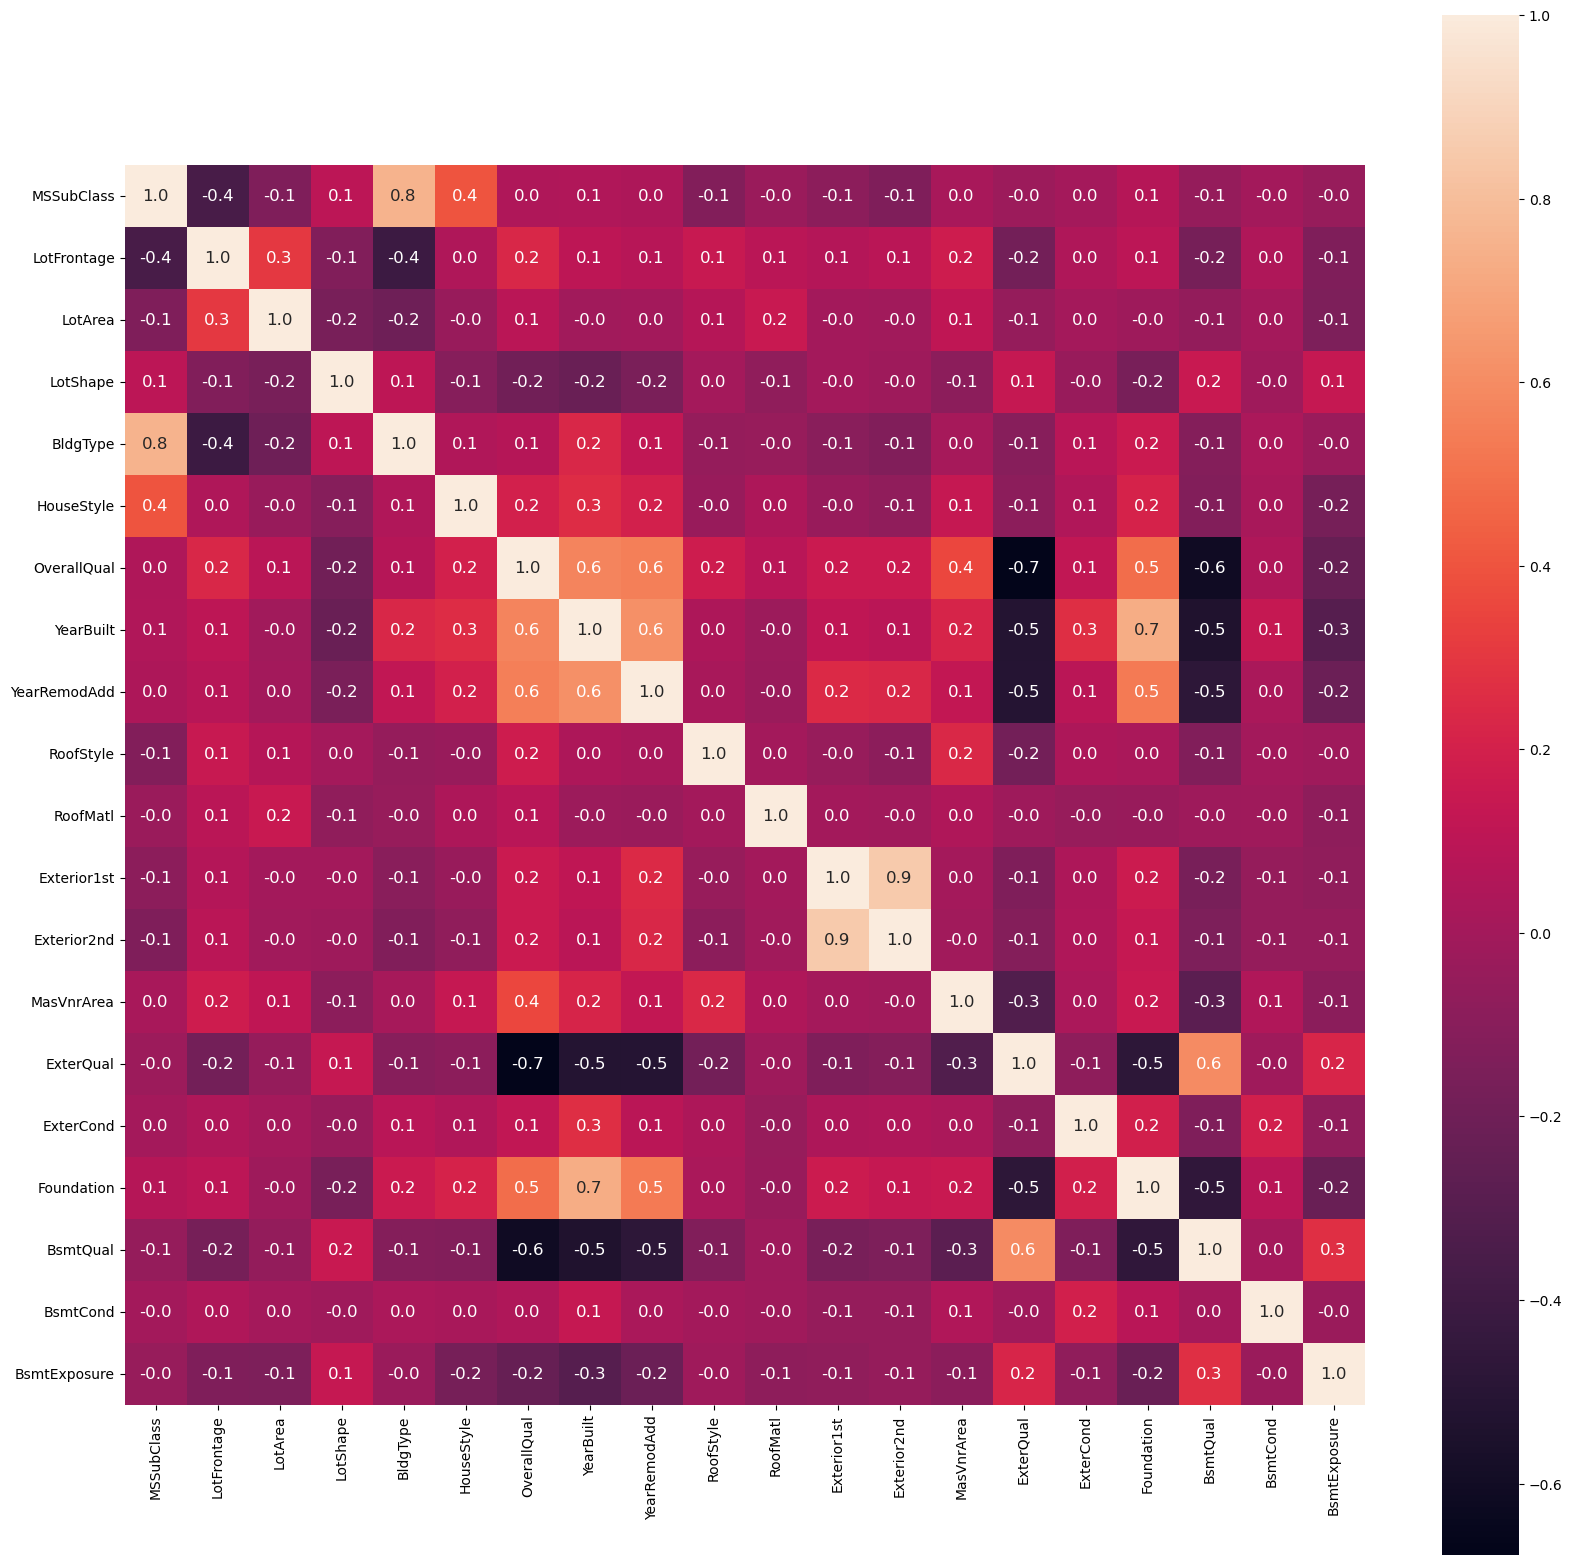

In [78]:
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [79]:
df = df.drop('BsmtCond' , axis=1)

<Axes: >

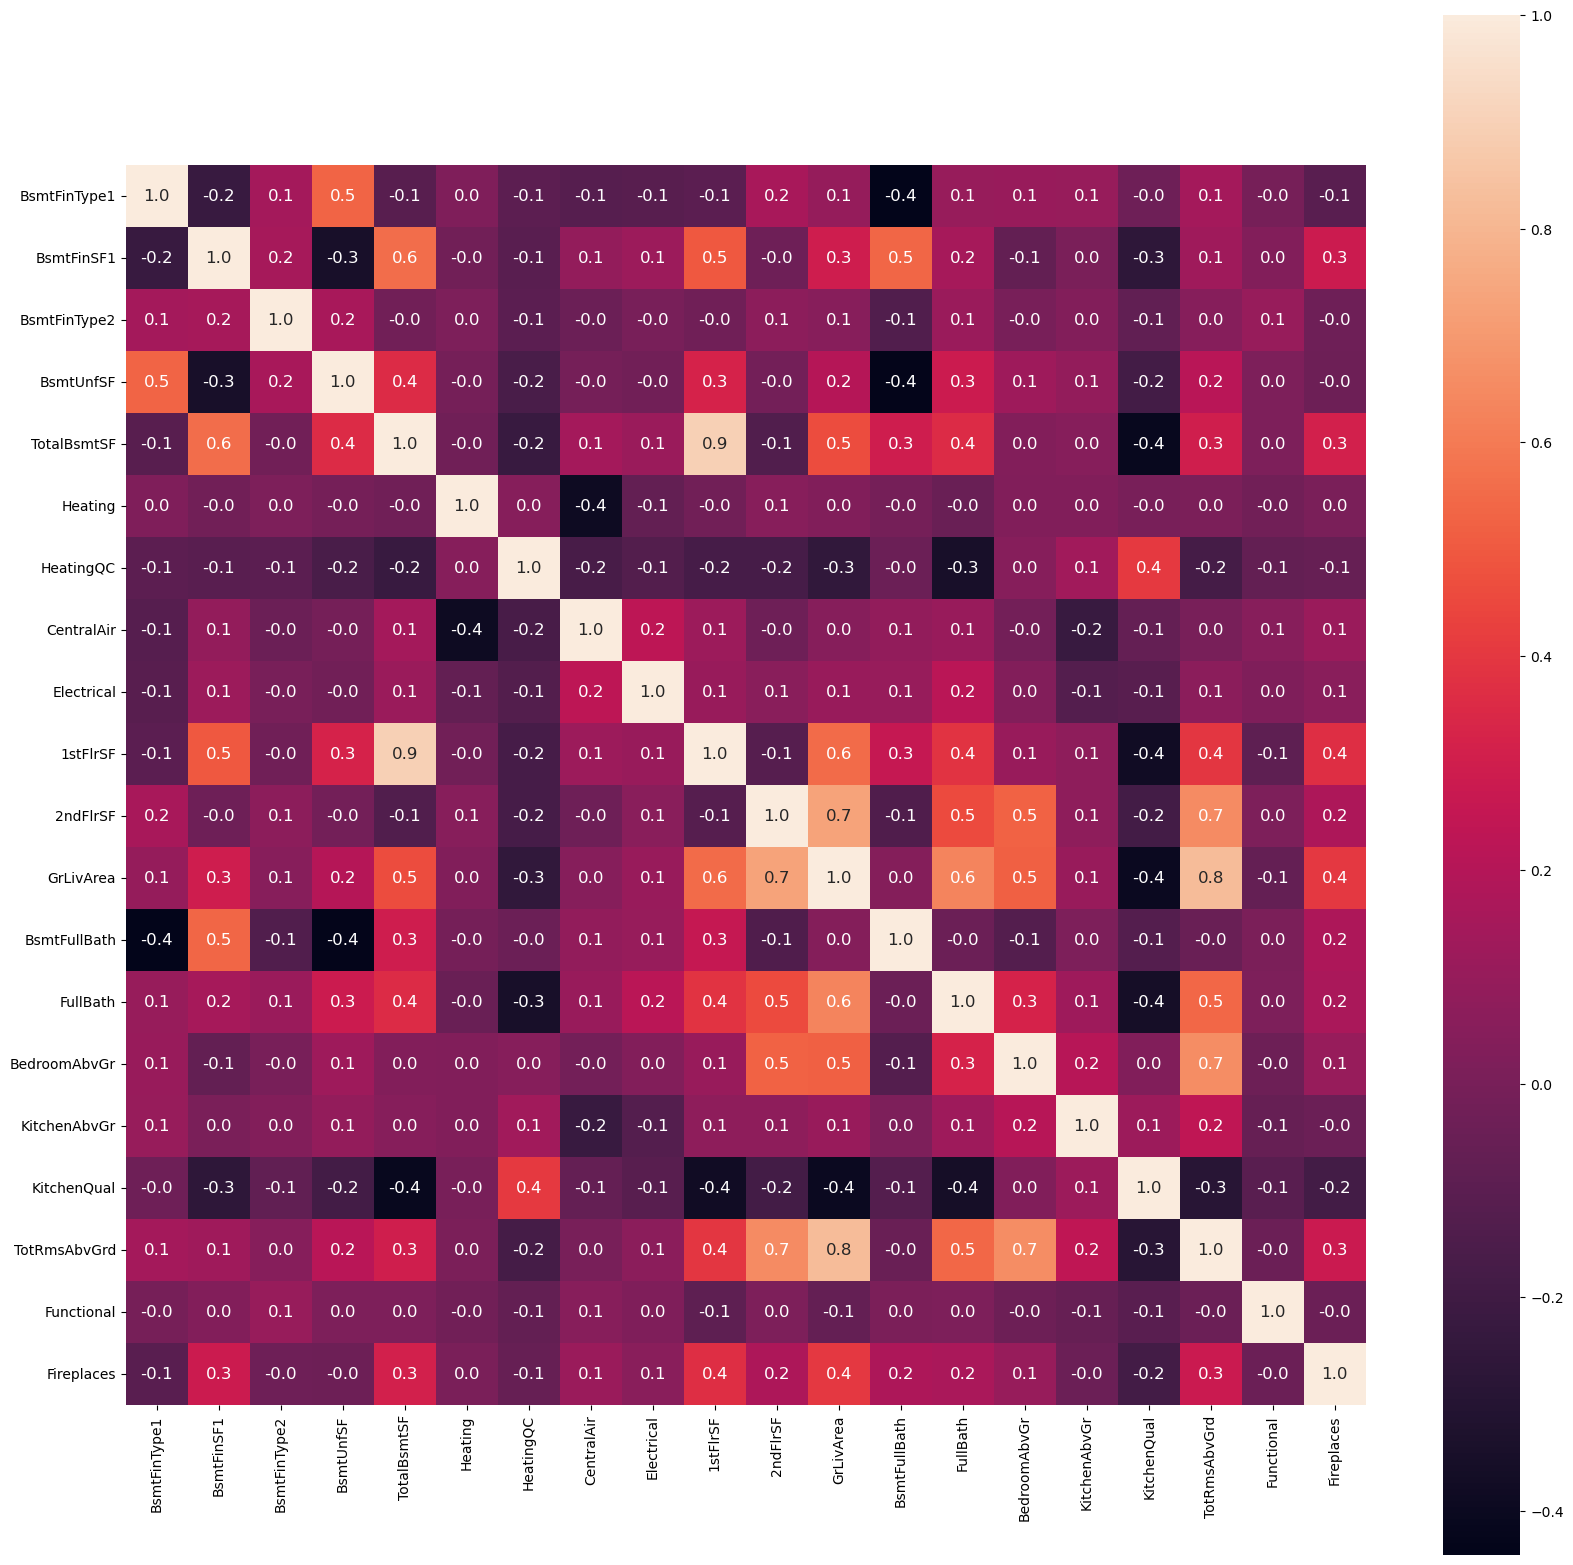

In [80]:
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [81]:
G2 = G2.drop('Functional' , axis = 1)
df = df.drop('Functional' , axis = 1)


<Axes: >

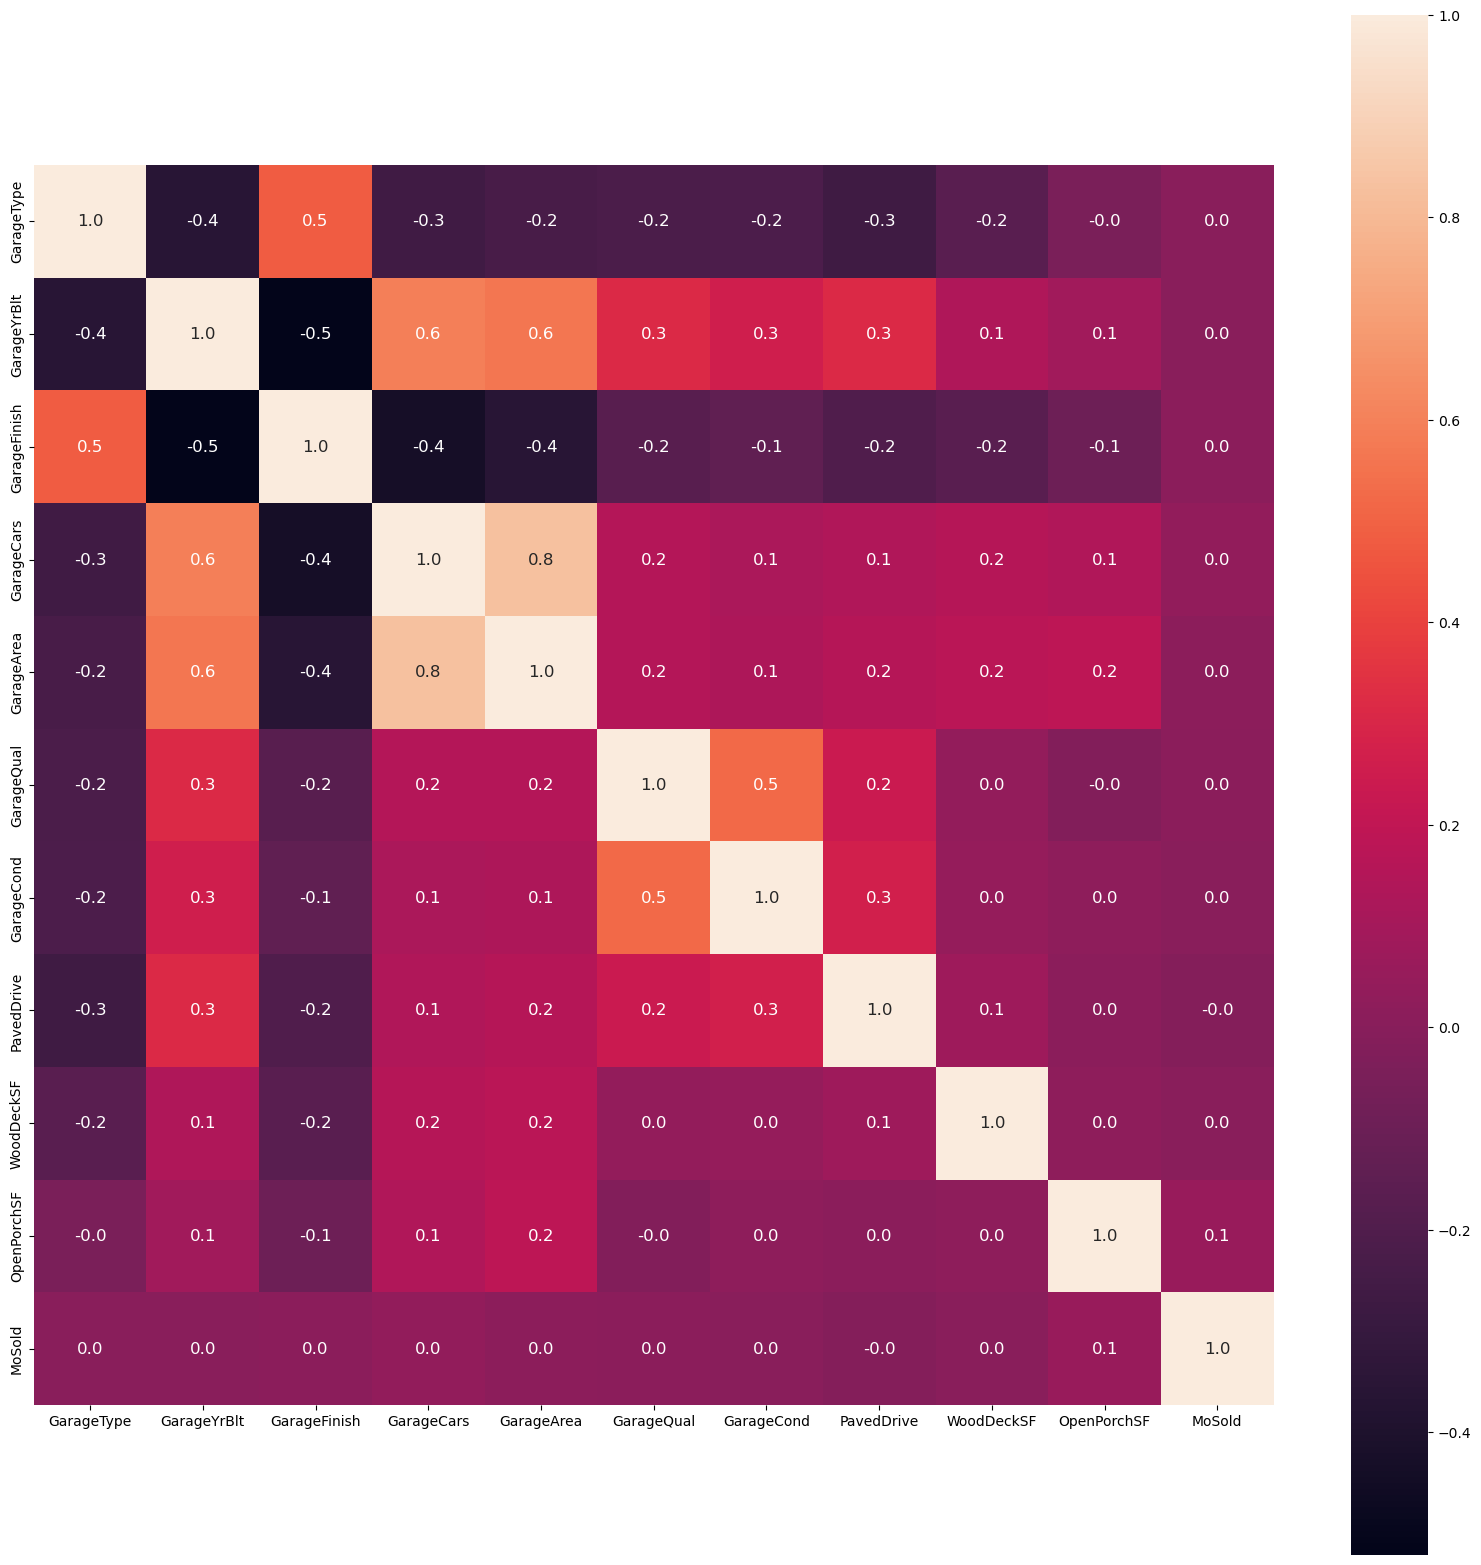

In [82]:
correlation = G3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [84]:

df = df.drop(['SaleCondition','SaleType', 'YrSold', 'MoSold'] , axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1346 non-null   int64  
 1   LotFrontage   1346 non-null   float64
 2   LotArea       1346 non-null   int64  
 3   LotShape      1346 non-null   int64  
 4   BldgType      1346 non-null   int64  
 5   HouseStyle    1346 non-null   int64  
 6   OverallQual   1346 non-null   int64  
 7   YearBuilt     1346 non-null   int64  
 8   YearRemodAdd  1346 non-null   int64  
 9   RoofStyle     1346 non-null   int64  
 10  RoofMatl      1346 non-null   int64  
 11  Exterior1st   1346 non-null   int64  
 12  Exterior2nd   1346 non-null   int64  
 13  MasVnrArea    1346 non-null   float64
 14  ExterQual     1346 non-null   int64  
 15  ExterCond     1346 non-null   int64  
 16  Foundation    1346 non-null   int64  
 17  BsmtQual      1346 non-null   int64  
 18  BsmtExposure  1346 non-null   int

In [85]:
df['BsmtQual'].value_counts()

BsmtQual
2    598
3    595
0    121
1     32
Name: count, dtype: int64

In [86]:
df = df[df['BsmtQual']!=1]

In [87]:
df.shape

(1314, 49)

In [88]:
X=df.drop("BsmtQual", axis = 1)
Y = df["BsmtQual"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1314 non-null   int64  
 1   LotFrontage   1314 non-null   float64
 2   LotArea       1314 non-null   int64  
 3   LotShape      1314 non-null   int64  
 4   BldgType      1314 non-null   int64  
 5   HouseStyle    1314 non-null   int64  
 6   OverallQual   1314 non-null   int64  
 7   YearBuilt     1314 non-null   int64  
 8   YearRemodAdd  1314 non-null   int64  
 9   RoofStyle     1314 non-null   int64  
 10  RoofMatl      1314 non-null   int64  
 11  Exterior1st   1314 non-null   int64  
 12  Exterior2nd   1314 non-null   int64  
 13  MasVnrArea    1314 non-null   float64
 14  ExterQual     1314 non-null   int64  
 15  ExterCond     1314 non-null   int64  
 16  Foundation    1314 non-null   int64  
 17  BsmtExposure  1314 non-null   int64  
 18  BsmtFinType1  1314 non-null   int

In [89]:
Y.info()
Y.shape

<class 'pandas.core.series.Series'>
Index: 1314 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype
--------------  -----
1314 non-null   int64
dtypes: int64(1)
memory usage: 20.5 KB


(1314,)

# Split training and testing data

In [90]:
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =0.25, random_state=30)
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))


Size of Train X =  985
Size of Train Y =  985
Size of Test X =  329
Size of Test Y =  329
